<a href="https://colab.research.google.com/github/U-S-Hari-Shankar/Machine-Learning/blob/main/LinearRegression_on_company_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing the  packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [2]:
# Read the company dataset
cd = pd.read_csv('Company_data.csv')
cd

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [3]:
# check the null values in the dataset
cd.isnull()

,TV,Radio,Newspaper,Sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


In [4]:
# add all the null values
cd.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [5]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
cd.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
# correlation between the columns of the company dataset
dc = cd.corr()
dc

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [8]:
#shape of correlation
dc.shape

(4, 4)

In [10]:
# Taking input and output from the given dataset
x = cd['TV'].values
y = cd['Sales'].values

In [11]:
# shape of the input and output
x.shape,y.shape

((200,), (200,))

In [12]:
# reshaping the shape of the input & output
x = x.reshape(-1,1)
y = y.reshape(-1,1)
x.shape,y.shape


((200, 1), (200, 1))

<function matplotlib.pyplot.show(close=None, block=None)>

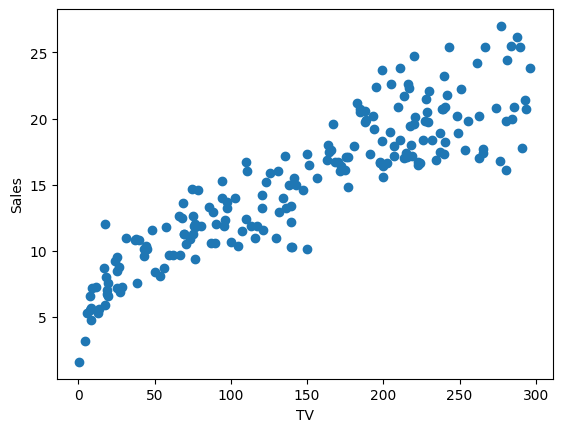

In [14]:
#scatter plot of the input and output feature
plt.scatter(x,y)
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show

In [17]:
#Training the data model using the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)
X_train.shape,X_test.shape,y_train.shape,y_test

((140, 1),
 (60, 1),
 (140, 1),
 array([[23.8],
        [16.6],
        [11.9],
        [19.8],
        [17.6],
        [25.5],
        [16.9],
        [17.9],
        [10.5],
        [17.1],
        [17.5],
        [11.3],
        [17.4],
        [16.7],
        [18.4],
        [15.9],
        [12.9],
        [17.8],
        [ 9.5],
        [18.4],
        [10.7],
        [12.5],
        [ 8.5],
        [11.5],
        [11.9],
        [19.9],
        [10.1],
        [18.9],
        [19.6],
        [20.9],
        [23.2],
        [16.9],
        [17.3],
        [16.7],
        [20.2],
        [20.5],
        [16.5],
        [11. ],
        [22.3],
        [ 7.6],
        [ 5.3],
        [12. ],
        [ 6.7],
        [19. ],
        [ 5.5],
        [14.6],
        [14.6],
        [21.5],
        [22.6],
        [19.7],
        [25.4],
        [15.2],
        [ 6.6],
        [21.2],
        [17.4],
        [17.6],
        [17.2],
        [ 7.2],
        [18.4],
        [ 9.6]]))

In [18]:
#fitting the data using linear regression to the model
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [19]:
#Errors of trained model using the predicted value and trained value
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
y_pred = reg.predict(X_train)
print(f'MAE = {mean_absolute_error(y_train, y_pred)}')
print(f'MSE = {mean_squared_error(y_train, y_pred)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_train, y_pred))}')
print(f'R_2 = {r2_score(y_train, y_pred)}')

MAE = 1.818436875498531
MSE = 5.252456315115158
RMSE = 2.2918237966988557
R_2 = 0.8155807735284488


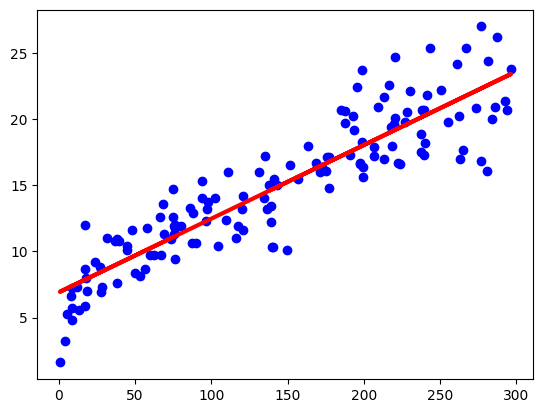

In [20]:
#Scatter plot of trained data and predicted data
plt.scatter(X_train,y_train, color='blue')
plt.plot(X_train,y_pred, color='red', linewidth=3)
plt.show()

In [21]:
#Errors of trained model using the predicted value and testing value
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
y_pred = reg.predict(X_test)
print(f'MAE = {mean_absolute_error(y_test, y_pred)}')
print(f'MSE = {mean_squared_error(y_test, y_pred)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'R_2 = {r2_score(y_test, y_pred)}')

MAE = 1.86239036505223
MSE = 5.143558863773587
RMSE = 2.267941547697733
R_2 = 0.7984701565892568


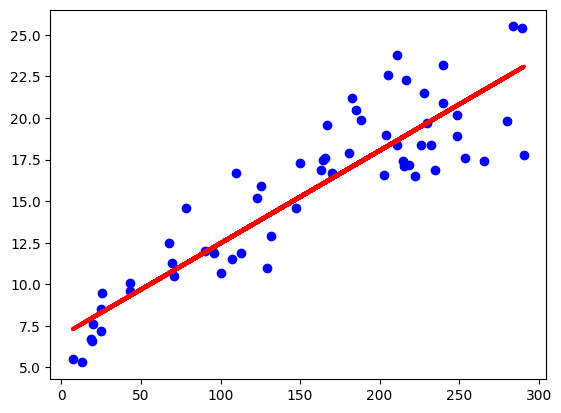

In [22]:
#Scatter plot of test data and predicted data
plt.scatter(X_test,y_test, color='blue')
plt.plot(X_test,y_pred, color='red', linewidth=3)
plt.show()

In [23]:
#Fitting L2 or LassoRegression to the model
reg = Lasso(alpha = 0.05)
reg.fit(X_train,y_train)

Lasso(alpha=0.05)

In [24]:
#Errors of trained model using the predicted value and trained value after fitting to LassoRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
y_pred = reg.predict(X_train)
print(f'MAE = {mean_absolute_error(y_train, y_pred)}')
print(f'MSE = {mean_squared_error(y_train, y_pred)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_train, y_pred))}')
print(f'R_2 = {r2_score(y_train, y_pred)}')

MAE = 1.8184410923324523
MSE = 5.252456648553161
RMSE = 2.2918238694439763
R_2 = 0.8155807618210924


In [34]:
#Fitting L1 or RidgeRegression to the model
reg = Ridge(alpha = 0.05)
reg.fit(X_train,y_train)

Ridge(alpha=0.05)

In [35]:
#Errors of trained model using the predicted value and trained value after fitting to RidgeRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
y_pred = reg.predict(X_train)
print(f'MAE = {mean_absolute_error(y_train, y_pred)}')
print(f'MSE = {mean_squared_error(y_train, y_pred)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_train, y_pred))}')
print(f'R_2 = {r2_score(y_train, y_pred)}')

MAE = 1.8184368771750465
MSE = 5.252456315115211
RMSE = 2.2918237966988673
R_2 = 0.815580773528447


In [37]:
#Errors of testing model using the predicted value and trained value after fitting to RidgeRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
y_pred = reg.predict(X_test)

print(f'MAE = {mean_absolute_error(y_test, y_pred)}')
print(f'MSE = {mean_squared_error(y_test, y_pred)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'R_2 = {r2_score(y_test, y_pred)}')

MAE = 1.8623903658150596
MSE = 5.143558841573777
RMSE = 2.267941542803469
R_2 = 0.7984701574590678


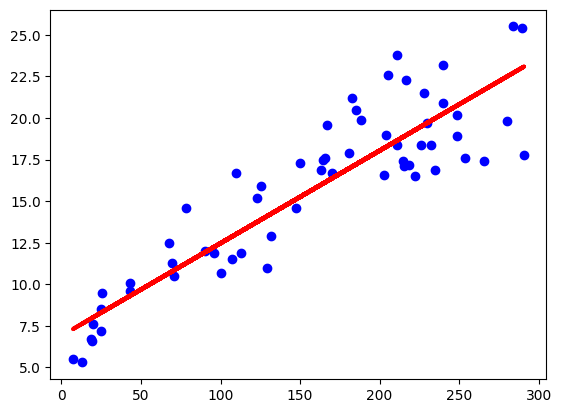

In [38]:
plt.scatter(X_test,y_test, color='blue')
plt.plot(X_test,y_pred, color='red', linewidth=3)
plt.show()